# Classification Example 001
In this example we have a NBA Log dataset. The goal is to predict if a player will last longer than 5 years in league. This data contains a **target** column, the TARGET_5Yrs column can be 0 (< 5 years) or 1 (>= 5 years). As we know our target, we can say for sure this is a **Classification** problem.

This dataset can be found [here](https://data.world/exercises/logistic-regression-exercise-1).

## Requirements
Here are the libraries we will use in this example

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

DATASET_PATH = os.path.join("datasets")
SEED = 7

## Loading the dataset
First thing to do is load the dataset, let's use Pandas to do it and check how data is available.

In [2]:
def load_nba_data(dataset_path=DATASET_PATH):
    csv_path = os.path.join(dataset_path, "nba_logreg.csv")
    return pd.read_csv(csv_path)

In [3]:
nba_data = load_nba_data()
nba_data.fillna(0, inplace=True)
nba_data.head(10)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0.0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1.0
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1.0
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0.0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0.0


Here we have a small sample of our dataset. Let's discard the **Name** and the **TARGET_5Yrs** columns, all the others are the features of every player, these will tell us if the player will last longer than 5 years in a league or not. The **TARGET_5Yrs** has the answer for every combination of features.

Let's check a quick description of our dataset with the `info()` function

In [4]:
# first let's remove the uneeded Name column, 'cause it's not relevant for this experiment
nba_data = nba_data.drop('Name', 1)
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
GP             1340 non-null int64
MIN            1340 non-null float64
PTS            1340 non-null float64
FGM            1340 non-null float64
FGA            1340 non-null float64
FG%            1340 non-null float64
3P Made        1340 non-null float64
3PA            1340 non-null float64
3P%            1340 non-null float64
FTM            1340 non-null float64
FTA            1340 non-null float64
FT%            1340 non-null float64
OREB           1340 non-null float64
DREB           1340 non-null float64
REB            1340 non-null float64
AST            1340 non-null float64
STL            1340 non-null float64
BLK            1340 non-null float64
TOV            1340 non-null float64
TARGET_5Yrs    1340 non-null float64
dtypes: float64(19), int64(1)
memory usage: 209.5 KB


We can also check some statistics information on our dataset with the `describe` function.

In [5]:
nba_data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.149627,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.051861,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


Let's take a look at our target is distributed over the dataset.

In [6]:
nba_data.groupby('TARGET_5Yrs').size()

TARGET_5Yrs
0.0    509
1.0    831
dtype: int64

In resume, we have 1340 objects in our dataset where 509 will not last longer than 5 years in league and the others 831 will. 

## Data Visualization

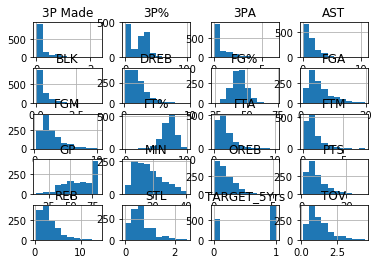

In [7]:
nba_data.hist()
plt.show()

## Machine Learning Models Evaluation
As we saw in the beginning of this post, this is a **Classification Problema**. We will create some models with different ML algorithms and check their accuracy.

### Spliting Data
Let's split our dataset into two new datasets. We will use 80% of the dataset to train our classification models and 20% of it to perform the validation.

In [7]:
data = nba_data.values
# data = np.array(data)

# now let's separate the features columns from the target column
X = data[:, 0:19]
Y = data[:, 19]

# as said before,  we will use 20% of the dataset for validation
validation_size = 0.20

# split the data into traning and testing
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=SEED)

Now that we have our training and testing set, we are going to create an array with the models we want to evaluate. We will use each model with the default settings.

In [8]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

To evaluate the models we will user K-Fold cross-validation and measure the accuracy for each model. This techinique randomly splits the training set into K distincts subsets (*folds*), then it trains and evaluates the model K times picking a different fold for every evaliation. The result will be an array with the K evaluation scores. For this example we will a Cross-Validation using the **StratifiedKFold** from **SKLearn**. We will use the Mean of the accuracies of each model to determinate which one has the best results.

In [11]:
scoring = 'accuracy'
models_results = []
for name, model in models:
    results = []
    skfolds = model_selection.StratifiedKFold(n_splits=10, random_state=SEED)
    for train_index, test_index in skfolds.split(X_train, Y_train):
        X_train_folds = X_train[train_index]
        Y_train_folds = (Y_train[train_index])
        X_test_folds = X_train[test_index]
        Y_test_folds = (Y_train[test_index])
        
        model.fit(X_train_folds, Y_train_folds)
        pred = model.predict(X_test_folds)
        correct = sum(pred == Y_test_folds)
        results.append(correct / len(pred))
    models_results.append((name, results))
    

names = []
scores = []
# the snippet bellow calculates the mean of the accuracies
for name, results in models_results:
    mean = np.array(results).mean()
    std = np.array(results).std()
    print("Model: %s, Accuracy Mean: %f (%f)" % (name, mean, std))
    names.append(name)
    scores.append(results)

Model: LR, Accuracy Mean: 0.705244 (0.026186)
Model: LDA, Accuracy Mean: 0.706205 (0.027503)
Model: KNN, Accuracy Mean: 0.674429 (0.026029)
Model: CART, Accuracy Mean: 0.634372 (0.047236)
Model: NB, Accuracy Mean: 0.632433 (0.040794)
Model: SVM, Accuracy Mean: 0.619384 (0.021099)


The results above show us that the Linear Discriminant Analysis has the best accuracy score among the models we tested. The boxplot below shows the accuracy scores spread accross each fold.

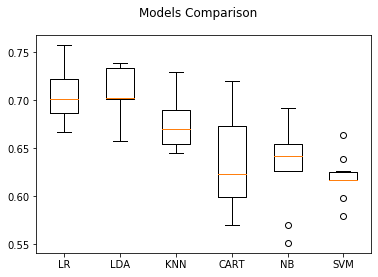

In [13]:
fig = plt.figure()
fig.suptitle('Models Comparison')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)
plt.show()

## Making Predictions

Now we will check the accuracy of the LDA model by making some predictions with the validation set we've prepared before. To do so, we will create an instance of the model and use the method `predict`.

In [16]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("Accuracy: {}".format(accuracy_score(Y_test, predictions)))

Accuracy: 0.6902985074626866


We can also check the Confusion Matrix for this model

In [17]:
print(confusion_matrix(Y_test, predictions))

[[ 52  45]
 [ 38 133]]


Each row in a confusion matrix represents an **actual target** and each column represents a **predicted target**. The first row of this matrix contains the **true negatives** and the **false positives**. Which means that 52 samples were correctly classified and 45 were wrongly classified. The second row shows us the **false negatives** and the **true positives**, wich means that 38 samples were wrongly classified and 133 were classified correctly.

The confusion matrix provides a lot of information, but if you want to get a more concise metrics you can use the `classification_report` function of Scikit-Learn. It will provide the **precision**, **recall** and **f1-score** metrics.

In [18]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.58      0.54      0.56        97
         1.0       0.75      0.78      0.76       171

    accuracy                           0.69       268
   macro avg       0.66      0.66      0.66       268
weighted avg       0.69      0.69      0.69       268



The accuracy of the positive predictions is called **precision**. It's defined by the formula: TP/(TP + FP), where TP is the number of **True Positives** and FP is the number of **False Positives**. This metric is tipically used along the **recall** which is the true positive rate - the ratio of positive instances that are correctly detected by the model. It's equation is: TP / (TP + FN) where FN is the **False Negatives**.

## Conclusion

This is a short brief about Classification with Python and Scikit-Learning. There is a lot more to cover, we can improve our models results by normalizing the data for example. There's also others metrics to cover. But the firts steps into Machine Learning world can be done with this tutorial. Hope you enjoy it!!

## References

* Your First Machine Learning Project in Python Step-By-Step - https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

* Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: Concepts, tools, and techniques to build intelligent systems. 